## Homework 5 Starting Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as R

# supress unnecessary warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
## generate N random samples from a 2D multivariate normal distribution
##
## with mean [mx, my]
##
## with covariance matrix [[  sx*sx, r*sx*sy],
##                         [r*sx*sy,   sy*sy]]
## where sx is the standard deviation along the x dimension
## where sy is the standard deviation along the y dimension
## where r is the correlation between the dimensions
##

def gensamples(N, mx, my, sx, sy, r):
    M   = np.array([mx, my])
    Cov = np.array([[  sx*sx, r*sx*sy],
                    [r*sx*sy,   sy*sy]])
    return (R.multivariate_normal(M, Cov, size=N, check_valid='warn'))

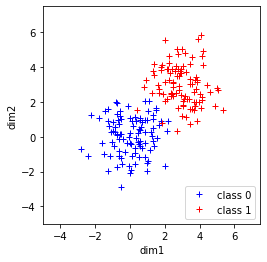

In [3]:
# classification problem used in Q1

mx0 = 0.;  my0 = 0.
sx0 = 1.;  sy0 = 1.
r0 = 0.

mx1 = 3.; my1 = 3.
sx1 = 1.; sy1 = 1.
r1 = 0.

N = 100

sample0 = gensamples(N, mx0, my0, sx0, sy0, r0)

sample1 = gensamples(N, mx1, my1, sx1, sy1, r1)

# plot example
plt.plot(sample0[:,0],sample0[:,1],'b+',sample1[:,0],sample1[:,1],'r+')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('equal')
plt.axis('square')
plt.legend(('class 0', 'class 1'), loc='lower right')
xymin = -5; xymax = 7.5
plt.ylim((xymin,xymax))
plt.xlim((xymin,xymax))
plt.show()

<hr>

<b>Q1 (10 point).</b> Write Keras code to learn this classification problem with a neural network with an input layer containing two nodes (for the x and y dimension) and output node. 

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\

1. Pick an activation function
2. Use SGD optimizier (lr=0.1, decay=e-6, mom=0.9)
3. Use mean_squared_error as the loss function
4. Save accuracy as one of the metrics when you compile your network
5. Assume batch size of 20
6. You will need to select the number of training epochs so that the accuracy asymptotes (e.g. doesn't change more than 0.5% between epochs).  Try training at least 10 times to hone in on a number of epochs that is the sweet spot for most randomizations  Use verbose=True.

In [5]:
def plot_model_acc(history):
    """Accuracy Plotting Function"""
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy As a Function of Number of Epochs Trained')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='lower right')
    plt.show()

In [6]:
network = models.Sequential()

nin  = 2
nout = 1

network = models.Sequential()
network.add(layers.Dense(nout, 
                         activation='linear', 
                         input_shape=(nin,)))

print(network.summary())
print('************************************************\n')

for layer in network.layers:
    print('layer name : {} | input shape : {} | output shape : {}'.format(layer.name, layer.input.shape, layer.output.shape))
print('************************************************\n')

for layer in network.layers:
    print(layer.get_config())
print()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None
************************************************

layer name : dense | input shape : (?, 2) | output shape : (?, 1)
************************************************

{'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 2), 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None, 'dtype': 'float32'}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {'dtype': 'float32'}}, 'kernel_regularizer': None, 'bias_regularize

In [7]:
# compile network
#
# configures the network for training, specifying optimizer and loss function
#
# optimizer='sgd'           : stochastic gradient descent (simplest, not the smartest)
# loss='mean_squared_error' : uses MSE (MSE = 1/N * SSE)
# metrics=['accuracy']      : what is printed when verbose=True
network.compile(optimizer='sgd', 
                loss='mean_squared_error', 
                metrics=['accuracy', 'mse'])

In [8]:
def create_network(nin=2, nout=1):
    network = models.Sequential()

    network = models.Sequential()
    network.add(layers.Dense(nout, 
                             activation='linear', 
                             input_shape=(nin,)))

    network.compile(optimizer='sgd', 
                    loss='mean_squared_error', 
                    metrics=['accuracy', 'mse'])
    
    return network

In [9]:
train_labels_onehot = [0]*len(sample0) + [1]*len(sample1)

sample0_list = list(sample0)
sample1_list = list(sample1)
train_vec = list()
train_vec.extend(sample0_list)
train_vec.extend(sample1_list)
print(sample0_list[0])
print(len(train_vec))

train_array = np.array(train_vec)
print(train_array.shape)

[ 1.35049537 -0.26665817]
200
(200, 2)


Train on 180 samples, validate on 20 samples
Epoch 1/40
180/180 [==============================] - 0s 3ms/sample - loss: 0.3603 - acc: 0.6667 - mean_squared_error: 0.3603 - val_loss: 0.1787 - val_acc: 0.7000 - val_mean_squared_error: 0.1787
Epoch 2/40
180/180 [==============================] - 0s 218us/sample - loss: 0.0726 - acc: 0.9500 - mean_squared_error: 0.0726 - val_loss: 0.0717 - val_acc: 1.0000 - val_mean_squared_error: 0.0717
Epoch 3/40
180/180 [==============================] - 0s 178us/sample - loss: 0.0611 - acc: 0.9667 - mean_squared_error: 0.0611 - val_loss: 0.0527 - val_acc: 1.0000 - val_mean_squared_error: 0.0527
Epoch 4/40
180/180 [==============================] - 0s 180us/sample - loss: 0.0583 - acc: 0.9667 - mean_squared_error: 0.0583 - val_loss: 0.0512 - val_acc: 1.0000 - val_mean_squared_error: 0.0512
Epoch 5/40
180/180 [==============================] - 0s 192us/sample - loss: 0.0562 - acc: 0.9778 - mean_squared_error: 0.0562 - val_loss: 0.0461 - val_acc: 1.0000 

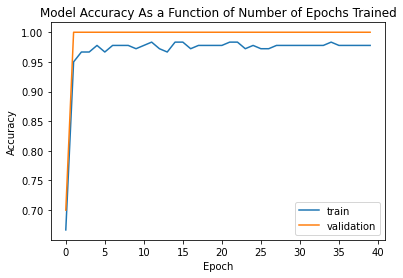

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Network failure
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [25]:
# now train the network
#
# training requires training patterns (train_image_vec) and teachers (train_labels_onehot)
#
# sets # training epochs, validation (described later), and batch_size
#
# set verbose=True to see training unfold

num_epochs = 40

network100 = create_network()
history = network100.fit(train_array, 
                      train_labels_onehot, 
                      verbose=True, 
                      validation_split=.1, 
                      epochs=num_epochs, 
                      batch_size=20)
print('Done training!')
plot_model_acc(history)

mean = sum(history.history['acc'][-20:])/len(history.history['acc'][-20:])
upper = mean * 1.005 > history.history['acc'][-6]
lower = mean * 0.995 < history.history['acc'][-6]

if upper and lower:
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("Network success!")
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
else: 
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("Network failure")
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

<hr>

<b>Q2 (2 points).</b> Create a plot of training accuracy as a function of epoch (with axes properly labeled).

dict_keys(['loss', 'acc', 'mean_squared_error', 'val_loss', 'val_acc', 'val_mean_squared_error'])


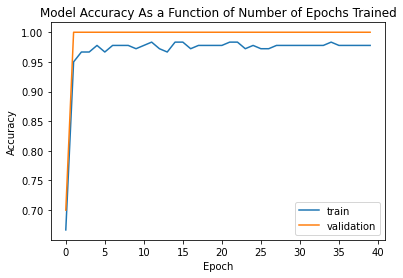

In [26]:
print(history.history.keys())

plot_model_acc(history)

<hr>

<b>Q3 (3 points).</b> Explore what happens when you (a) set the batch size equal to 1 (so that weights get updated after every training pattern), and (b) set the batch size equal to the total number of training patterns (so that weights get updated once per epoch after all of the training patterns have been shown). 

In [27]:
# Batch size equal to 1
bs1_network = create_network()
bs1_history = bs1_network.fit(train_array, 
                      train_labels_onehot, 
                      verbose=True, 
                      validation_split=.1, 
                      epochs=num_epochs, 
                      batch_size=1)
print('Done training!')

Train on 180 samples, validate on 20 samples
Epoch 1/20
180/180 [==============================] - 1s 5ms/sample - loss: 0.4771 - acc: 0.9500 - mean_squared_error: 0.4771 - val_loss: 0.0367 - val_acc: 1.0000 - val_mean_squared_error: 0.0367
Epoch 2/20
180/180 [==============================] - 0s 2ms/sample - loss: 0.0588 - acc: 0.9611 - mean_squared_error: 0.0588 - val_loss: 0.0448 - val_acc: 1.0000 - val_mean_squared_error: 0.0448
Epoch 3/20
180/180 [==============================] - 0s 2ms/sample - loss: 0.0590 - acc: 0.9667 - mean_squared_error: 0.0590 - val_loss: 0.0327 - val_acc: 1.0000 - val_mean_squared_error: 0.0327
Epoch 4/20
180/180 [==============================] - 0s 2ms/sample - loss: 0.0603 - acc: 0.9500 - mean_squared_error: 0.0603 - val_loss: 0.0264 - val_acc: 1.0000 - val_mean_squared_error: 0.0264
Epoch 5/20
180/180 [==============================] - 0s 2ms/sample - loss: 0.0578 - acc: 0.9611 - mean_squared_error: 0.0578 - val_loss: 0.0712 - val_acc: 1.0000 - val_me

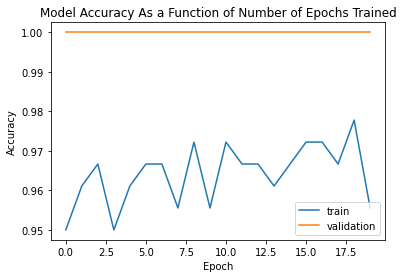

In [28]:
plot_model_acc(bs1_history)

In [29]:
# Batch size equal to the number of training patterns
bse_network = create_network()
bse_history = bse_network.fit(train_array, 
                      train_labels_onehot, 
                      verbose=True, 
                      validation_split=.1, 
                      epochs=num_epochs, 
                      batch_size=train_array.shape[0])
print('Done training!')

Train on 180 samples, validate on 20 samples
Epoch 1/20
180/180 [==============================] - 0s 3ms/sample - loss: 2.2372 - acc: 0.4611 - mean_squared_error: 2.2372 - val_loss: 2.8028 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.8028
Epoch 2/20
180/180 [==============================] - 0s 104us/sample - loss: 1.5429 - acc: 0.4611 - mean_squared_error: 1.5429 - val_loss: 1.9096 - val_acc: 0.1000 - val_mean_squared_error: 1.9096
Epoch 3/20
180/180 [==============================] - 0s 97us/sample - loss: 1.0857 - acc: 0.4944 - mean_squared_error: 1.0857 - val_loss: 1.3211 - val_acc: 0.1500 - val_mean_squared_error: 1.3211
Epoch 4/20
180/180 [==============================] - 0s 66us/sample - loss: 0.7839 - acc: 0.5222 - mean_squared_error: 0.7839 - val_loss: 0.9321 - val_acc: 0.2500 - val_mean_squared_error: 0.9321
Epoch 5/20
180/180 [==============================] - 0s 45us/sample - loss: 0.5839 - acc: 0.5556 - mean_squared_error: 0.5839 - val_loss: 0.6739 - val_acc: 0.3000

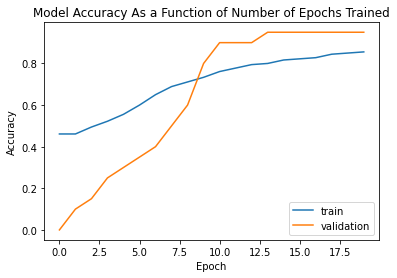

In [30]:
plot_model_acc(bse_history)

<hr>

<b>Q4 (4 points).</b> Homework5.ipynb provides code that generates an array of test patterns and provides a plottest() function that displays a shaded contour plot of network predictions on these test patterns (these were discussed in class). All you need to do is apply these test patterns to the trained network from Q1 and plot the results using the plottest() function. 

In [31]:
# generate test pattern array for Q4

xymin = -5
xymax = 7.5
Npts = 50
xv, yv = np.meshgrid(np.linspace(xymin, xymax, Npts), 
                     np.linspace(xymin, xymax, Npts))
test_pats = np.concatenate((xv.reshape((Npts*Npts,1)), 
                            yv.reshape((Npts*Npts,1))), axis=1)

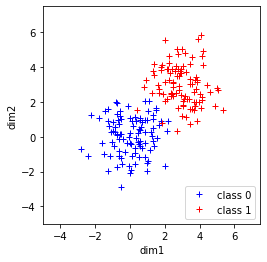

In [32]:
# plot example
plt.plot(sample0[:,0],sample0[:,1],'b+',sample1[:,0],sample1[:,1],'r+')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('equal')
plt.axis('square')
plt.legend(('class 0', 'class 1'), loc='lower right')
xymin = -5; xymax = 7.5
plt.ylim((xymin,xymax))
plt.xlim((xymin,xymax))
plt.show()

(2500, 2)
[[-5.         -5.        ]
 [-4.74489796 -5.        ]
 [-4.48979592 -5.        ]
 ...
 [ 6.98979592  7.5       ]
 [ 7.24489796  7.5       ]
 [ 7.5         7.5       ]]


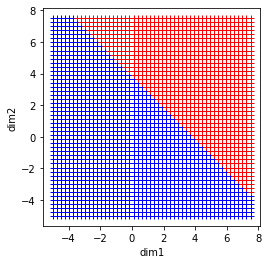

In [33]:
print(test_pats.shape)

print(test_pats)

# train_labels_onehot = [0]*len(sample0) + [1]*len(sample1)
test_labels_onehot = [0]*test_pats.shape[0]

# plot example
for idx in range((test_pats.shape[0])):
    point = test_pats[idx,:]
    if point[1]>((-1*point[0]+4)):
        test_labels_onehot[idx] = 1
        plt.plot(point[0],point[1],'r+')
    else:
        plt.plot(point[0],point[1],'b+')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('equal')
plt.axis('square')
#plt.legend(('class 0', 'class 1'), loc='lower right')
xymin = -5; xymax = 7.5
#plt.ylim((xymin,xymax))
#plt.xlim((xymin,xymax))
plt.show()

test_labels_onehot = np.array(test_labels_onehot).reshape((test_pats.shape[0],1))

In [34]:
# function for generating plot for Q4
# xv is array of x-values of test grid (from meshgrid)
# yv is array of y-values of test grid (from meshgrid)
# out is the output of the neural network given the test patterns
# sample0, sample1 are the training patterns from earlier

def plottest(xv, yv, out, sample0, sample1):
    # reshape out
    zv = out.reshape(xv.shape)

    # create figure
    fig = plt.figure()
    plt.contourf(xv, yv, zv, levels=xv.shape[0], cmap=plt.cm.gist_yarg)
    plt.plot(sample0[:,0], sample0[:,1], 'b+', 
             sample1[:,0], sample1[:,1], 'r+')    
    
    plt.xlabel('dim1')
    plt.ylabel('dim2')
    plt.axis('equal')
    plt.axis('square')
    xymin = -5; xymax = 7.5
    plt.ylim((xymin,xymax))
    plt.xlim((xymin,xymax))
    plt.show()

In [35]:
print(test_pats.shape)
print(test_labels_onehot.shape)

(2500, 2)
(2500, 1)


In [44]:
# call network.evaluate() if you have test patterns and test answers and want to know performance
results = network.evaluate(test_pats, 
                           test_labels_onehot, 
                           verbose=False)

test_loss = results[0]
test_acc = results[1]

print('test_loss (MSE)     : {}'.format(test_loss))
print('test_acc (%Correct) : {}'.format(test_acc))

out = network.predict(
   test_pats, 
   batch_size = 20, 
   verbose = 0, 
   max_queue_size = 10, 
   workers = 1, 
   use_multiprocessing = False)

test_loss (MSE)     : 0.17890884981155394
test_acc (%Correct) : 0.9416000247001648


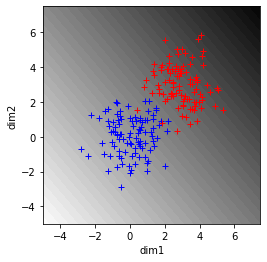

In [45]:
plottest(xv, yv, out, sample0, sample1)